In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv("Desktop\owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
COUNTRY = "Germany"

In [5]:
df = df.loc[df["location"] == COUNTRY, :]
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
41800,DEU,Europe,Germany,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
41801,DEU,Europe,Germany,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
41802,DEU,Europe,Germany,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,-3679.6,-4.61,-6.71,-43.856726
41803,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
41804,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN


In [6]:
df["date"] = pd.to_datetime(df["date"])

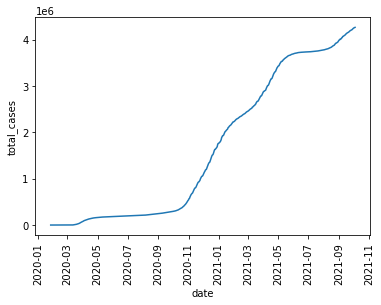

In [7]:
sns.lineplot(x="date", y="total_cases", data=df);
plt.xticks(rotation=90);

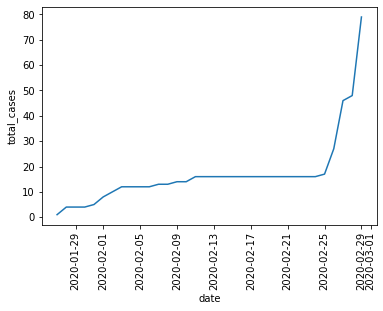

In [8]:
sns.lineplot(x="date", y="total_cases", data=df.loc[df["date"] < datetime(2020, 3, 1)]);
plt.xticks(rotation=90);

In [9]:
START_DATE = datetime(2020, 2, 25)

In [10]:
df = df.loc[df["date"] > START_DATE, :]

In [11]:
df["day_number"] = np.arange(df.shape[0]) + 1

In [12]:
train_size = int(df.shape[0] * 0.8)
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

In [13]:
train_df.shape, test_df.shape

((469, 66), (118, 66))

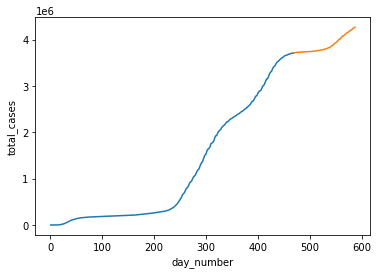

In [14]:
sns.lineplot(x="day_number", y="total_cases", data=train_df);
sns.lineplot(x="day_number", y="total_cases", data=test_df);

In [15]:
model = LinearRegression()

In [16]:
TRAIN_FEATURES = ["day_number"]

In [17]:
model.fit(train_df[TRAIN_FEATURES], train_df["total_cases"])

LinearRegression()

In [18]:
prediction = model.predict(test_df[TRAIN_FEATURES])

In [19]:
mean_squared_error(test_df["total_cases"], prediction)

59174162909.36842

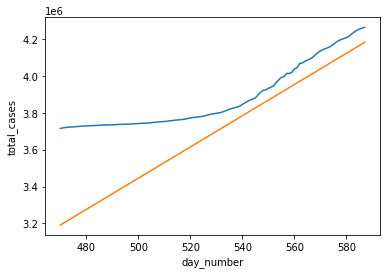

In [20]:
sns.lineplot(x="day_number", y="total_cases", data=test_df);
sns.lineplot(x= test_df["day_number"], y=prediction);

In [21]:
x2 = (test_df["total_cases"] - prediction).mean()

In [22]:
x1 = (test_df["total_cases"] - prediction).var()

In [23]:
print(x2, x1)

195032.1063460131 21317295449.790512


Экспонента

In [24]:
train_df["total_cases_log"] = np.log(train_df["total_cases"])
test_df["total_cases_log"] = np.log(test_df["total_cases"])

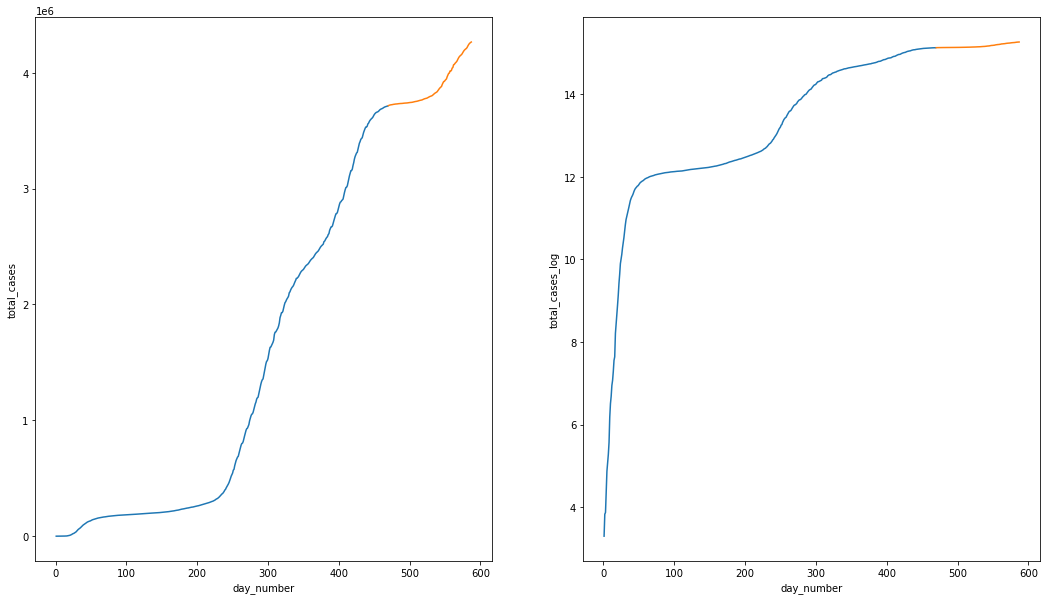

In [25]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(18)
sns.lineplot(x="day_number", y="total_cases", data=train_df, ax=ax[0], legend=True);
sns.lineplot(x="day_number", y="total_cases", data=test_df, ax=ax[0]);

sns.lineplot(x="day_number", y="total_cases_log", data=train_df, ax=ax[1]);
sns.lineplot(x="day_number", y="total_cases_log", data=test_df, ax=ax[1]);

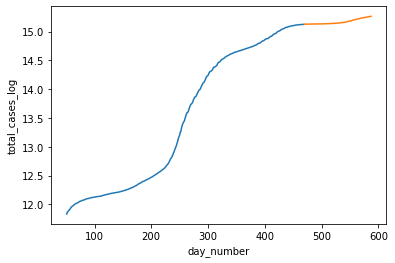

In [26]:
sns.lineplot(x="day_number", y="total_cases_log", data=train_df.loc[train_df["day_number"] > 50]);
sns.lineplot(x="day_number", y="total_cases_log", data=test_df);

In [27]:
model.fit(train_df[TRAIN_FEATURES], np.log(train_df["total_cases"]))

LinearRegression()

In [28]:
prediction_exp = model.predict(test_df[TRAIN_FEATURES])

In [29]:
prediction_exp = np.exp(model.predict(test_df[TRAIN_FEATURES]))

In [30]:
mean_squared_error(test_df["total_cases"], prediction_exp)


274850343873742.84

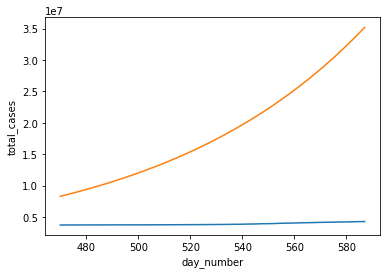

In [31]:
sns.lineplot(x="day_number", y="total_cases", data=test_df);
sns.lineplot(x= test_df["day_number"], y=prediction_exp);

In [32]:
x3 = (test_df["total_cases"] - prediction_exp).mean()
x3

-14761582.31766097

In [33]:
x4 = (test_df["total_cases"] - prediction_exp).var()
x4

57432749569351.305

Сигмоида

In [34]:
train_df["new_cases_log"] = np.log(train_df["new_cases"])
test_df["new_cases_log"] = np.log(test_df["new_cases"])

C:\Users\User\miniconda3\envs\mlisuct\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\miniconda3\envs\mlisuct\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


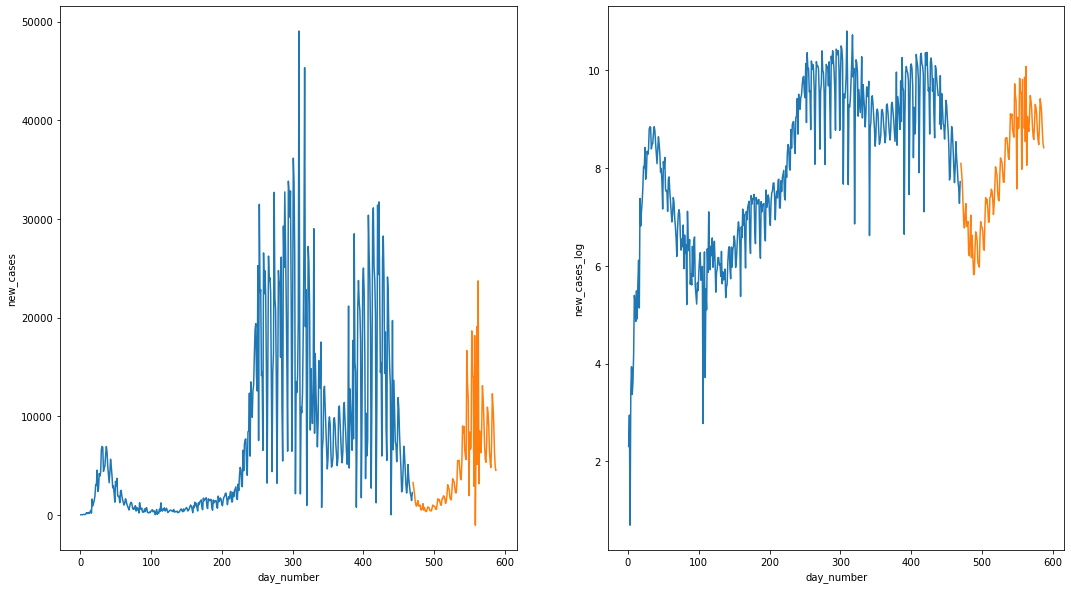

In [35]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(18)
sns.lineplot(x="day_number", y="new_cases", data=train_df, ax=ax[0], legend=True);
sns.lineplot(x="day_number", y="new_cases", data=test_df, ax=ax[0]);

sns.lineplot(x="day_number", y="new_cases_log", data=train_df, ax=ax[1]);
sns.lineplot(x="day_number", y="new_cases_log", data=test_df, ax=ax[1]);

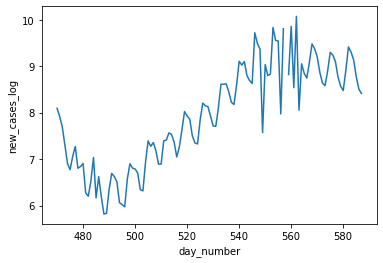

In [36]:
sns.lineplot(x="day_number", y="new_cases_log", data=train_df.loc[train_df["day_number"] > 500]);
sns.lineplot(x="day_number", y="new_cases_log", data=test_df);

In [37]:
test_df['day_number_sqr'] = test_df['day_number']**2

In [38]:
train_df['day_number_sqr'] = train_df['day_number']**2

In [39]:
TRAIN_FEATURESS = ['day_number_sqr', 'day_number']

In [40]:
model.fit(train_df[TRAIN_FEATURESS], np.log1p(train_df["new_cases"].fillna(1).clip(lower=1)))

LinearRegression()

In [41]:
prediction_sig = model.predict(test_df[TRAIN_FEATURESS])
prediction_sig

array([9.34071878, 9.34139958, 9.3420491 , 9.34266734, 9.34325429,
       9.34380996, 9.34433435, 9.34482745, 9.34528927, 9.3457198 ,
       9.34611905, 9.34648702, 9.3468237 , 9.3471291 , 9.34740322,
       9.34764605, 9.3478576 , 9.34803786, 9.34818684, 9.34830454,
       9.34839096, 9.34844609, 9.34846993, 9.34846249, 9.34842377,
       9.34835377, 9.34825248, 9.34811991, 9.34795605, 9.34776091,
       9.34753449, 9.34727678, 9.34698779, 9.34666752, 9.34631596,
       9.34593312, 9.34551899, 9.34507358, 9.34459689, 9.34408891,
       9.34354965, 9.34297911, 9.34237728, 9.34174417, 9.34107978,
       9.3403841 , 9.33965713, 9.33889889, 9.33810936, 9.33728854,
       9.33643645, 9.33555307, 9.3346384 , 9.33369245, 9.33271522,
       9.33170671, 9.33066691, 9.32959582, 9.32849346, 9.32735981,
       9.32619487, 9.32499865, 9.32377115, 9.32251237, 9.3212223 ,
       9.31990095, 9.31854831, 9.31716439, 9.31574919, 9.3143027 ,
       9.31282493, 9.31131587, 9.30977553, 9.30820391, 9.30660

In [42]:
new_cases = test_df['new_cases'].values

In [43]:
list_total_cases_n = []

In [44]:
for index in range(test_df.shape[0]):
    if index == 0:
        list_total_cases_n.append(train_df['total_cases'].iloc[-1] + np.expm1(prediction_sig[1]))
    else:
        list_total_cases_n.append(list_total_cases_n[index-1] + np.expm1(prediction_sig[index]))
        
#list_total_cases_n

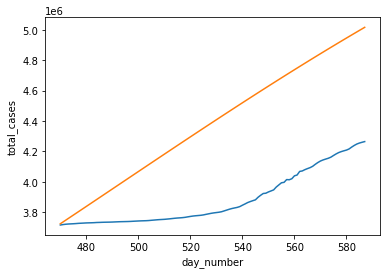

In [45]:
sns.lineplot(x='day_number',  y="total_cases", data=test_df);
sns.lineplot(x= test_df['day_number'], y=list_total_cases_n); 

In [46]:
mean_squared_error(test_df["total_cases"], list_total_cases_n)

305563023077.5307

In [47]:
x9 = (list_total_cases_n-test_df["total_cases"]).mean()
x9

502244.00704375986

In [48]:
end = (list_total_cases_n-test_df["total_cases"]).var()
end

53769655512.87784